<a href="https://colab.research.google.com/github/anu13771/Machine-Leaning-projects/blob/main/Instant_Music_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle -q

In [45]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
kaggle_config=json.load(open("kaggle (1).json"))

In [9]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [10]:
#setting the environment variables
os.environ['KAGGLE_USERNAME']=kaggle_config['username']
os.environ['KAGGLE_KEY']=kaggle_config['key']

In [11]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 799MB/s]


In [12]:
!ls

'kaggle (1).json'   sample_data   spotify-million-song-dataset.zip


In [13]:
with zipfile.ZipFile('spotify-million-song-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [14]:
df=pd.read_csv('/content/spotify_millsongdata.csv')

Initial Understanding

In [16]:
df.shape


(57650, 4)

In [17]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [20]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [22]:
#Top artist and songs
top_artists=df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [25]:
df=df.sample(10000)

df=df.drop('link',axis=1).reset_index(drop=True)

In [29]:
#worldcloud for song lyrics
all_lyrics=" ".join(df['text'].dropna())
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(all_lyrics)


WordCloud to Visualize the most common words in the lyrics


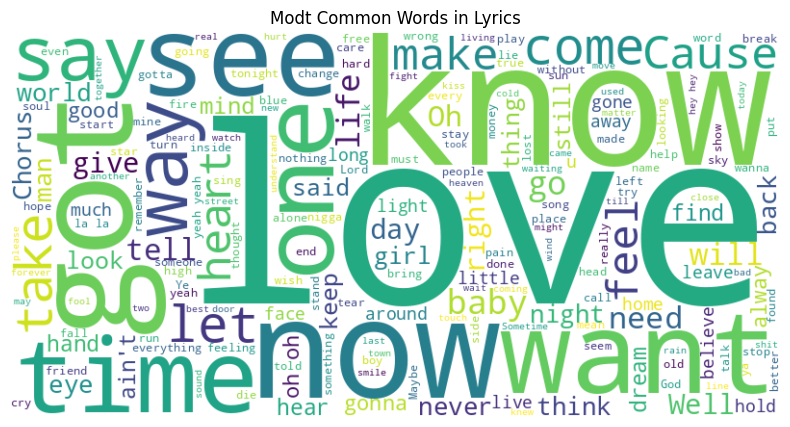

In [30]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Modt Common Words in Lyrics")
plt.show()

Data PreProcessing

In [33]:
#download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
stop_words=set(stopwords.words('english'))

In [48]:
def preprocess_text(text):
  #remove special characters and numbers
  text=re.sub(r"[^a-zA-Z\s]","",text) # Corrected regex to keep alphanumeric characters and spaces
  text=text.lower()
  tokens=word_tokenize(text)
  tokens=[word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [49]:
df['cleaned_text']=df['text'].apply(preprocess_text)

In [50]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [51]:
cosine_sim=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [61]:
def recommend_songs(song_name,cosine_sim=cosine_sim,df=df,top_n=5):
  idx=df[df['song'].str.lower()==song_name.lower()].index
  if len(idx)==0:
    return"Song not found in the dataset!"
  idx=idx[0]
  sim_scores=list(enumerate(cosine_sim[idx]))
  sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
  sim_scores=sim_scores[1:top_n+1]
  song_indices=[i[0] for i in sim_scores]
  return df[['artist','song']].iloc[song_indices]

In [62]:
df["song"][2]

'Jacksonville Kid'

In [63]:
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations=recommend_songs("Jacksonville Kid")
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
                   artist                       song
79             Thin Lizzy  The Boys Are Back In Town
282    Christina Aguilera                i hate boys
3808  High School Musical          The Boys Are Back
9028         Human League             Boys And Girls
5788        Kylie Minogue                 Disco Down
